In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
%matplotlib inline
sns.set()
import matplotlib as mpl
mpl.style.use('classic')
params = {'mathtext.default': 'regular' } 
plt.rcParams.update(params)
mpl.rcParams['font.size'] = 8

In [2]:
df = pd.read_excel("Data.xlsx", sheet_name = "Rahi bhai")

In [3]:
df.columns = ["Borehole", "Depth", "Phi", "C", "SPT", "N60"]
df.head()

,Borehole,Depth,Phi,C,SPT,N60
0,BH1,22.5,38.0,6.3452,50,30.0
1,BH2,28.5,37.5,3.8679,50,30.0
2,BH3,28.5,38.0,2.2164,50,30.0
3,BH4,30.0,38.0,7.9967,50,30.0
4,NaN,16.5,33.0,4.6936,50,30.0


In [4]:
df.drop("Borehole",axis=1,inplace= True)

In [5]:
df.head()

,Depth,Phi,C,SPT,N60
0,22.5,38.0,6.3452,50,30.0
1,28.5,37.5,3.8679,50,30.0
2,28.5,38.0,2.2164,50,30.0
3,30.0,38.0,7.9967,50,30.0
4,16.5,33.0,4.6936,50,30.0


[Text(0, 0.5, 'Frequency (%)'),
 Text(0.5, 0, 'Angle of Internal Friction (degree)')]

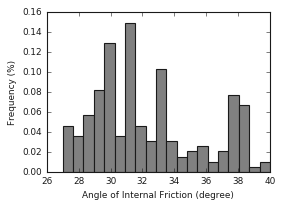

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["Phi"],weights = np.ones(len(df["Phi"])) / len(df["Phi"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Angle of Internal Friction (degree)")
#fig.savefig("hist_phi.jpg", dpi = 600, transparent=True, bbox_inches="tight")

[Text(0, 0.5, 'Frequency (%)'), Text(0.5, 0, '$SPT-N_{60}$')]

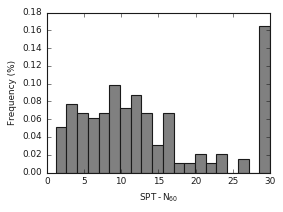

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["N60"],weights = np.ones(len(df["N60"])) / len(df["N60"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "$SPT-N_{60}$")
#fig.savefig("hist_N60.jpg", dpi = 600, transparent=True, bbox_inches="tight")

[Text(0, 0.5, 'Frequency (%)'), Text(0.5, 0, 'Depth of Sample Collection (m)')]

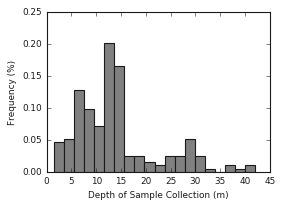

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["Depth"],weights = np.ones(len(df["Depth"])) / len(df["Depth"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Depth of Sample Collection (m)")
#fig.savefig("hist_depth.jpg", dpi = 600, transparent=True, bbox_inches="tight")

In [9]:
df.drop(["C", "SPT"], axis= 1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Depth,194.0,14.103093,8.230469,1.5,9.0,12.0,15.000,42.0
Phi,194.0,32.324742,3.385079,27.0,30.0,31.5,34.375,40.0
N60,194.0,13.629897,8.986353,1.2,6.6,11.4,17.700,30.0


In [10]:
print("skewness of N60 is {}" .format(skew(df["N60"])))
print("Kurtosis of N60 is {}" .format(kurtosis(df["N60"])))
print("\nskewness of Depth is {}" .format(skew(df["Depth"])))
print("kurtosis of Depth is {}" .format(kurtosis(df["Depth"])))
print("\nskewness of Phi is {}" .format(skew(df["Phi"])))
print("kurtosis of Phi is {}" .format(kurtosis(df["Phi"])))


skewness of N60 is 0.74088638029011
Kurtosis of N60 is -0.6732100653595232

skewness of Depth is 1.1110704743254278
kurtosis of Depth is 0.928878836300917

skewness of Phi is 0.5996865331321365
kurtosis of Phi is -0.741127503742181


In [11]:
df.isnull().sum()

Depth    0
Phi      0
C        0
SPT      0
N60      0
dtype: int64

In [12]:
X = df.drop(columns = ["Phi", "C","SPT"], axis = 1)
y = df["Phi"]


[Text(0, 0.5, 'Angle of Internal Friction (degree)'),
 Text(0.5, 0, '$SPT-N_{60}$')]

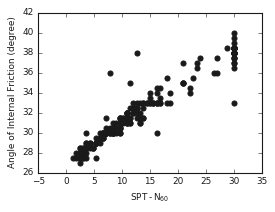

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
ax.scatter(df["N60"], df["Phi"], color = "k")
fig.patch.set_facecolor("white")
ax.set(ylabel = "Angle of Internal Friction (degree)", xlabel = "$SPT-N_{60}$")
#fig.savefig("Phi vs SPT-N60.jpg", dpi = 600, transparent=True, bbox_inches="tight")

[Text(0, 0.5, 'Angle of Internal Friction (degree)'),
 Text(0.5, 0, 'Depth of Sample Collction (m)')]

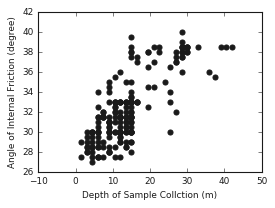

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
ax.scatter(df["Depth"], df["Phi"], color = "k")
fig.patch.set_facecolor("white")
ax.set(ylabel = "Angle of Internal Friction (degree)", xlabel = "Depth of Sample Collction (m)")
#fig.savefig("Phi vs depth.jpg", dpi = 600, transparent=True, bbox_inches="tight")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train

,Depth,N60
38,37.5,22.8
31,22.5,28.8
173,9.0,3.6
12,28.5,30.0
109,7.5,10.2
...,...,...
106,7.5,10.8
14,27.0,30.0
92,13.5,11.4
179,6.0,3.0


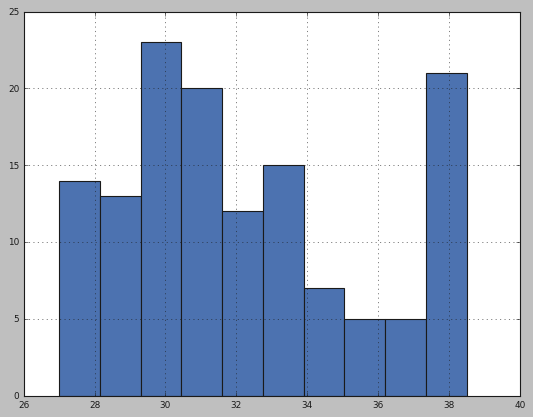

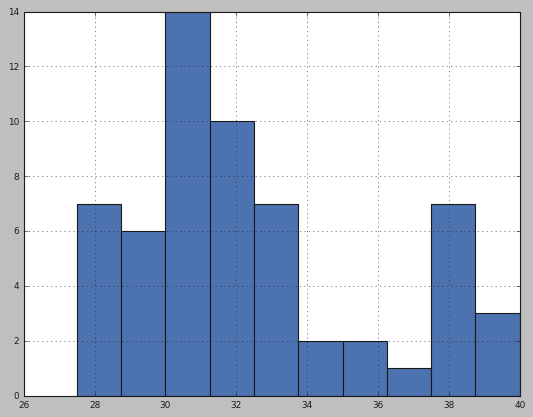

In [18]:
def train_test_check(y_train, y_test):
    y_train.hist()
    plt.show()
    
    y_test.hist()
    plt.show()
    
train_test_check(y_train,y_test)

Training Accuracy of the Linear Regression model is 0.9181
Testing Accuracy of the Linear Regression model is 0.8912

RMSE_training of the Linear Regression model is 0.9699
RMSE_testing of the Linear Regression model is 1.1035

MAE_training of the Linear Regression model is 0.6007
MAE_testing of the Linear Regression model is 0.6548


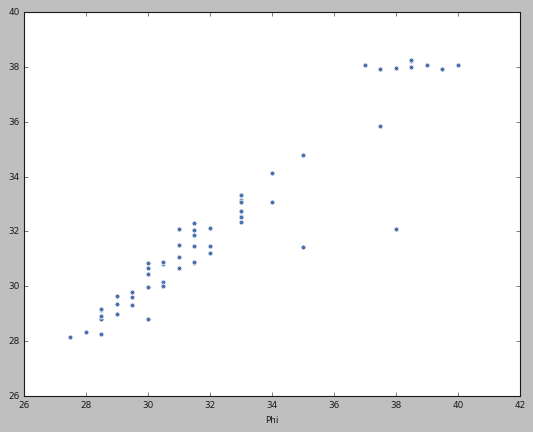

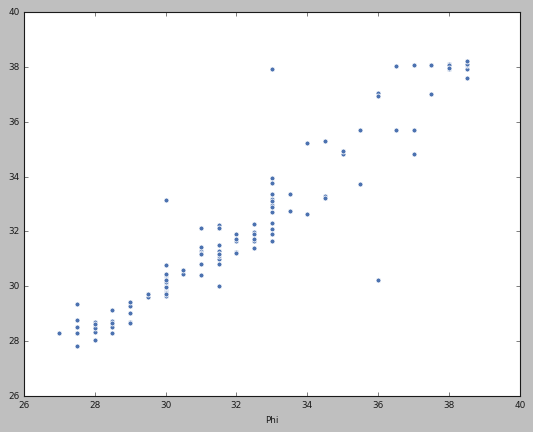


Coefficient of depth is 0.0123 and Coeffiecient of SPT-N60 is 0.3443

Intercept is 27.4001


In [19]:
def Linear_reg(X_train,X_test,y_train,y_test):
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    ypred_lr_train = lr.predict(X_train)
    ypred_lr_test = lr.predict(X_test)
    
    train_accuracy = r2_score(y_train, ypred_lr_train)
    test_accuracy = r2_score(y_test,ypred_lr_test)
    
    rmse_train = MSE(y_train,ypred_lr_train)**0.5
    rmse_test = MSE(y_test,ypred_lr_test)**0.5
    
    mae_train = MAE(y_train, ypred_lr_train)
    mae_test = MAE(y_test, ypred_lr_test)
    
    print("Training Accuracy of the Linear Regression model is " + str(round(train_accuracy,4)))
    print("Testing Accuracy of the Linear Regression model is " + str(round(test_accuracy,4)))
    
    print("\nRMSE_training of the Linear Regression model is " + str(round(rmse_train,4)))
    print("RMSE_testing of the Linear Regression model is " + str(round(rmse_test,4)))
    
    print("\nMAE_training of the Linear Regression model is " + str(round(mae_train,4)))
    print("MAE_testing of the Linear Regression model is " + str(round(mae_test,4)))
    
    sns.scatterplot(y_test, ypred_lr_test)
    plt.show()
    sns.scatterplot(y_train, ypred_lr_train)
    plt.show()
    
    print("\nCoefficient of depth is {:0.4f} and Coeffiecient of SPT-N60 is {:0.4f}".format(lr.coef_[0],lr.coef_[1]))
    print("\nIntercept is {:0.4f}".format(lr.intercept_))
    
    #one = pd.DataFrame({"Training" : y_train})
    #two = pd.DataFrame({"Testing": y_test})
    #three = pd.DataFrame({"LR_train": ypred_lr_train})
    #four = pd.DataFrame({"LR_test": ypred_lr_test})
    
    #one.to_excel("one.xlsx")
    #two.to_excel("two.xlsx")
    #three.to_excel("three.xlsx")
    #four.to_excel("four.xlsx")

Linear_reg(X_train,X_test,y_train,y_test)


In [29]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf", C = 10)
svr.fit(X_tr_scaled, y_tr)
ypred_svr = svr.predict(X_test_scaled)
ypred_svr_train = svr.predict(X_tr_scaled)
print("RMSE for training is : {:0.4f}".format(MSE(y_tr,ypred_svr_train)**0.5))
print("MAE for training is : {:0.4f}".format(MAE(y_tr,ypred_svr_train)))
print("r2-score for training is : {:0.4f}".format(r2_score(y_tr,ypred_svr_train)))

print("\nRMSE for testing is : {:0.4f}".format(MSE(y_test,ypred_svr)**0.5))
print("MAE for testing is : {:0.4f}".format(MAE(y_test,ypred_svr)))
print("r2-score for testing is : {:0.4f}".format(r2_score(y_test,ypred_svr)))

#svr_rbf_train = pd.DataFrame({"SVR_train": ypred_svr_train})
#svr_rbf_train.to_excel("svr_rbf_train.xlsx")

#svr_rbf_test = pd.DataFrame({"SVR_test": ypred_svr})
#svr_rbf_test.to_excel("svr_rbf_test.xlsx")

RMSE for training is : 0.9823
MAE for training is : 0.5558
r2-score for training is : 0.9138

RMSE for testing is : 1.1626
MAE for testing is : 0.7284
r2-score for testing is : 0.8792


In [30]:
svr = SVR(kernel = "linear", C = 10)
svr.fit(X_tr_scaled, y_tr)
ypred_svr = svr.predict(X_test_scaled)
ypred_svr_train = svr.predict(X_tr_scaled)
print("RMSE for training is : {:0.4f}".format(MSE(y_tr,ypred_svr_train)**0.5))
print("MAE for training is : {:0.4f}".format(MAE(y_tr,ypred_svr_train)))
print("r2-score for training is : {:0.4f}".format(r2_score(y_tr,ypred_svr_train)))

print("\nRMSE for testing is : {:0.4f}".format(MSE(y_test,ypred_svr)**0.5))
print("MAE for testing is : {:0.4f}".format(MAE(y_test,ypred_svr)))
print("r2-score for testing is : {:0.4f}".format(r2_score(y_test,ypred_svr)))

"""svr_lin_train = pd.DataFrame({"SVR_train": ypred_svr_train})
svr_lin_train.to_excel("svr_lin_train.xlsx")

svr_lin_test = pd.DataFrame({"SVR_test": ypred_svr})
svr_lin_test.to_excel("svr_lin_test.xlsx")"""

RMSE for training is : 1.0377
MAE for training is : 0.6100
r2-score for training is : 0.9038

RMSE for testing is : 1.0822
MAE for testing is : 0.6300
r2-score for testing is : 0.8954


'svr_lin_train = pd.DataFrame({"SVR_train": ypred_svr_train})\nsvr_lin_train.to_excel("svr_lin_train.xlsx")\n\nsvr_lin_test = pd.DataFrame({"SVR_test": ypred_svr})\nsvr_lin_test.to_excel("svr_lin_test.xlsx")'

## ANN

In [21]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [22]:
X_train = X_train.values

In [23]:
X_test = X_test.values

In [24]:
y_train = y_train.values

In [25]:
y_test = y_test.values

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(X_tr)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
X_tr_scaled = scaler.transform(X_tr)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model = Sequential()

n_cols = X_tr.shape[1]
model.add(Dense(2,activation='relu', input_shape = (n_cols,)))
model.add(Dense(3,activation='relu'))

model.add(Dense(1))

optimizer = Adam(lr= 0.01)
model.compile(optimizer= optimizer ,loss='mse')

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 100, restore_best_weights= True)

In [34]:
model.fit(x=X_tr_scaled, 
          y=y_tr, 
          epochs=1000,
          validation_data=(X_val_scaled, y_val), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/1000
4/4 [==============================] - 0s 28ms/step - loss: 1031.0449 - val_loss: 1049.6680
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 1020.6059 - val_loss: 1038.4971
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 1009.4266 - val_loss: 1026.1880
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 997.0090 - val_loss: 1012.6649
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 983.3320 - val_loss: 997.7599
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 968.6071 - val_loss: 981.3016
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 951.9280 - val_loss: 963.2523
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 933.9921 - val_loss: 943.4069
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 914.0637 - val_loss: 921.6641
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 8

4/4 [==============================] - 0s 5ms/step - loss: 14.2466 - val_loss: 17.7806
Epoch 82/1000
4/4 [==============================] - ETA: 0s - loss: 12.56 - 0s 5ms/step - loss: 13.9491 - val_loss: 17.4010
Epoch 83/1000
4/4 [==============================] - 0s 5ms/step - loss: 13.6471 - val_loss: 17.0356
Epoch 84/1000
4/4 [==============================] - 0s 3ms/step - loss: 13.3714 - val_loss: 16.6680
Epoch 85/1000
4/4 [==============================] - 0s 3ms/step - loss: 13.0862 - val_loss: 16.3113
Epoch 86/1000
4/4 [==============================] - 0s 5ms/step - loss: 12.8018 - val_loss: 15.9488
Epoch 87/1000
4/4 [==============================] - 0s 5ms/step - loss: 12.5425 - val_loss: 15.5978
Epoch 88/1000
4/4 [==============================] - 0s 5ms/step - loss: 12.2692 - val_loss: 15.2557
Epoch 89/1000
4/4 [==============================] - 0s 3ms/step - loss: 12.0012 - val_loss: 14.9155
Epoch 90/1000
4/4 [==============================] - 0s 3ms/step - loss: 11.7349 

4/4 [==============================] - 0s 5ms/step - loss: 2.1760 - val_loss: 2.0476
Epoch 162/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.1341 - val_loss: 1.9929
Epoch 163/1000
4/4 [==============================] - 0s 5ms/step - loss: 2.0869 - val_loss: 1.9356
Epoch 164/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.0468 - val_loss: 1.8835
Epoch 165/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.0049 - val_loss: 1.8286
Epoch 166/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.9649 - val_loss: 1.7790
Epoch 167/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.9259 - val_loss: 1.7357
Epoch 168/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.8922 - val_loss: 1.6930
Epoch 169/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.8609 - val_loss: 1.6490
Epoch 170/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.8254 - val_loss: 1.6008
Epoch 171/1000


4/4 [==============================] - 0s 5ms/step - loss: 1.0668 - val_loss: 0.5630
Epoch 244/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0640 - val_loss: 0.5666
Epoch 245/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0631 - val_loss: 0.5696
Epoch 246/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0633 - val_loss: 0.5740
Epoch 247/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0621 - val_loss: 0.5735
Epoch 248/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0605 - val_loss: 0.5739
Epoch 249/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0601 - val_loss: 0.5705
Epoch 250/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0596 - val_loss: 0.5649
Epoch 251/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0586 - val_loss: 0.5628
Epoch 252/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.0589 - val_loss: 0.5624
Epoch 253/1000


Epoch 325/1000
4/4 [==============================] - ETA: 0s - loss: 2.008 - 0s 4ms/step - loss: 1.0476 - val_loss: 0.5601
Epoch 326/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0468 - val_loss: 0.5525
Epoch 327/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0461 - val_loss: 0.5433
Epoch 328/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0556 - val_loss: 0.5298
Epoch 329/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0507 - val_loss: 0.5466
Epoch 330/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0477 - val_loss: 0.5390
Epoch 331/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0468 - val_loss: 0.5343
Epoch 332/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0469 - val_loss: 0.5302
Epoch 333/1000
4/4 [==============================] - ETA: 0s - loss: 1.844 - 0s 5ms/step - loss: 1.0485 - val_loss: 0.5240
Epoch 334/1000
4/4 [==============================] 

Epoch 406/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0481 - val_loss: 0.5647
Epoch 407/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.0480 - val_loss: 0.5580
Epoch 408/1000
4/4 [==============================] - ETA: 0s - loss: 0.321 - 0s 3ms/step - loss: 1.0470 - val_loss: 0.5628
Epoch 409/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0479 - val_loss: 0.5495
Epoch 410/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0461 - val_loss: 0.5416
Epoch 411/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0472 - val_loss: 0.5308
Epoch 412/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0520 - val_loss: 0.5189
Epoch 413/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0524 - val_loss: 0.5198
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0482 - val_loss: 0.5386
Epoch 415/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.

Epoch 487/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0526 - val_loss: 0.5222
Epoch 488/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0508 - val_loss: 0.5477
Epoch 489/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0466 - val_loss: 0.5682
Epoch 490/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.0478 - val_loss: 0.5810
Epoch 491/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0490 - val_loss: 0.5781
Epoch 492/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0483 - val_loss: 0.5717
Epoch 493/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.0564 - val_loss: 0.5420
Epoch 494/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0477 - val_loss: 0.5513
Epoch 495/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0464 - val_loss: 0.5561
Epoch 496/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0479 - val_loss: 0.5608


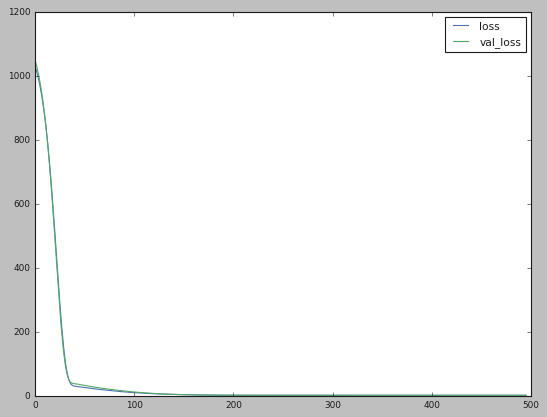

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
predictions = model.predict(X_test_scaled)

In [37]:
np.sqrt(MSE(y_test, predictions))

1.0904785462997213

In [38]:
MAE(y_test, predictions)

0.6579357082560912

In [39]:
r2_score(y_test, predictions)

0.8937468970673295

In [40]:
predictions1 = model.predict(X_tr_scaled)
print("R2 score of training data is: {:0.4f}".format(r2_score(y_tr,predictions1)))
print("\nRMSE of training data is: {:0.4f}".format(MSE(y_tr,predictions1)**0.5))
print("\nMAE of training data is: {:0.4f}".format(MAE(y_tr,predictions1)))

R2 score of training data is: 0.9059

RMSE of training data is: 1.0262

MAE of training data is: 0.6341


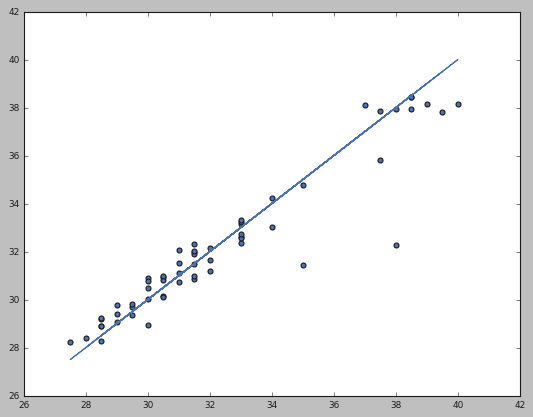

In [41]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test)

In [42]:
"""ann_train = pd.DataFrame(predictions1)
ann_test = pd.DataFrame(predictions)
y_tr = pd.DataFrame(y_tr)

ann_train.to_excel("ann_train_new.xlsx")
ann_test.to_excel("ann_test_new.xlsx")
y_tr.to_excel("y_tr.xlsx")"""

'ann_train = pd.DataFrame(predictions1)\nann_test = pd.DataFrame(predictions)\ny_tr = pd.DataFrame(y_tr)\n\nann_train.to_excel("ann_train_new.xlsx")\nann_test.to_excel("ann_test_new.xlsx")\ny_tr.to_excel("y_tr.xlsx")'

In [43]:
new = pd.read_excel("Comparision with others.xlsx")
new.head()

,SPT-N,SPT-N60,Testing,Wolff,N. Puri,N. Puri_60,Res_LR
0,12.0,7.2,30.0,29.232006,29.8761,28.3761,0.010185
1,50.0,30.0,39.0,35.614000,41.7511,35.5011,0.920181
2,10.0,6.0,29.5,28.880560,29.2511,28.0011,-0.113562
3,19.0,11.4,31.0,30.449822,32.0636,29.6886,-0.491249
4,23.0,13.8,33.0,31.137162,33.3136,30.4386,0.663971


In [44]:
new["Res_Wolff"] = new["Testing"] - new["Wolff"]
new["Res_N. Puri"] = new["Testing"] - new["N. Puri"]
new.head()

,SPT-N,SPT-N60,Testing,Wolff,N. Puri,N. Puri_60,Res_LR,Res_Wolff,Res_N. Puri
0,12.0,7.2,30.0,29.232006,29.8761,28.3761,0.010185,0.767994,0.1239
1,50.0,30.0,39.0,35.614000,41.7511,35.5011,0.920181,3.386000,-2.7511
2,10.0,6.0,29.5,28.880560,29.2511,28.0011,-0.113562,0.619440,0.2489
3,19.0,11.4,31.0,30.449822,32.0636,29.6886,-0.491249,0.550178,-1.0636
4,23.0,13.8,33.0,31.137162,33.3136,30.4386,0.663971,1.862838,-0.3136


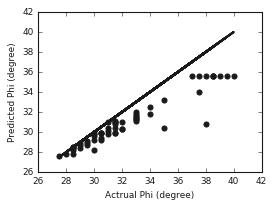

In [45]:
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['font.size'] = 8
fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(new["Testing"], new["Wolff"], c = "k")
plt.plot(new["Testing"], new["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actrual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("Wolff scatter.jpg", dpi = 600, transparent=True, bbox_inches="tight")

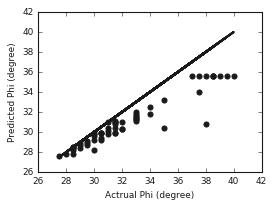

In [46]:
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['font.size'] = 8
fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(new["Testing"], new["Wolff"], c = "k")
plt.plot(new["Testing"], new["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actrual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("Wolff scatter.jpg", dpi = 600, transparent=True, bbox_inches="tight")

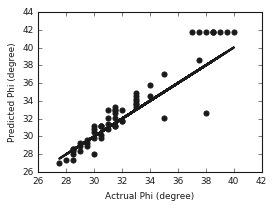

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(new["Testing"], new["N. Puri"], c = "k")
plt.plot(new["Testing"], new["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actrual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("N. Puri scatter.jpg", dpi = 600, transparent=True, bbox_inches="tight")

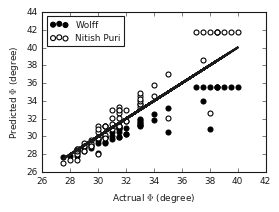

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(new["Testing"], new["Wolff"], color = "black", label = "Wolff")
ax.scatter(new["Testing"], new["N. Puri"], color = "white", edgecolors = "black",label = "Nitish Puri")
plt.plot(new["Testing"], new["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted $\Phi$ (degree)", xlabel = "Actrual $\Phi$ (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
ax.legend(loc = 2, prop = {"size" : 8})
#fig.savefig("Wolf_fN. Puri scatter.jpg", dpi = 600, transparent=True, bbox_inches="tight")

In [49]:
print("R2 score of Wolff is: {:0.4f}".format(r2_score(new["Testing"], new["Wolff"])))
print("\nRMSE of Wolff is: {:0.4f}".format(MSE(new["Testing"], new["Wolff"])**0.5))
print("\nMAE of Wolff is: {:0.4f}".format(MAE(new["Testing"], new["Wolff"])))

R2 score of Wolff is: 0.6664

RMSE of Wolff is: 1.9324

MAE of Wolff is: 1.3978


In [50]:
print("R2 score of N.Puri is: {:0.4f}".format(r2_score(new["Testing"], new["N. Puri"])))
print("\nRMSE of N.Puri is: {:0.4f}".format(MSE(new["Testing"], new["N. Puri"])**0.5))
print("\nMAE of N.Puri is: {:0.4f}".format(MAE(new["Testing"], new["N. Puri"])))

R2 score of N.Puri is: 0.7204

RMSE of N.Puri is: 1.7689

MAE of N.Puri is: 1.2737


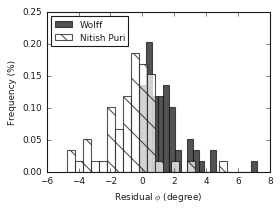

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(new["Res_Wolff"],weights = np.ones(len(new["Res_Wolff"])) / len(new["Res_Wolff"]),\
         color = "k",alpha = 0.75, label = "Wolff", bins = 20)
plt.hist(new["Res_N. Puri"],weights = np.ones(len(new["Res_N. Puri"])) / len(new["Res_N. Puri"]),\
         color = "w", alpha = 0.75, hatch = "\\", label = "Nitish Puri", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual $\phi$ (degree)")
ax.legend(loc = 2, prop = {"size" : 8})
#fig.savefig("hist_Wolff_N.Puri.jpg", dpi = 600, transparent=True, bbox_inches="tight")

[Text(0, 0.5, 'Frequency (%)'), Text(0.5, 0, 'Residual Phi (degree)')]

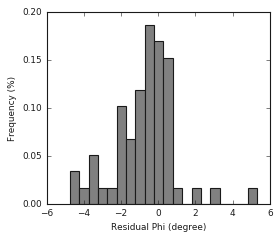

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6,3)
plt.hist(new["Res_N. Puri"],weights = np.ones(len(new["Res_N. Puri"])) / len(new["Res_N. Puri"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")
#fig.savefig("res_N. Puri.jpg", dpi = 600, transparent=True, bbox_inches="tight")

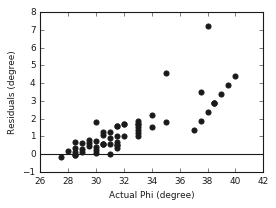

In [53]:
fig, ax = plt.subplots(figsize = (3.6,2.5))
#fig.set_size_inches(3.5,3)

ax.scatter(new["Testing"], new["Res_Wolff"], c = "k", label = "Testing Data")
#ax.scatter(new["Testing"], new["Res_Wolff"], c = "w", label = "Training Data")
ax.set(ylabel = "Residuals (degree)", xlabel = "Actual Phi (degree)")
#ax.legend(loc = 2, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 1)
#fig.savefig("res_Wolff.jpg", dpi = 600, transparent=True, bbox_inches="tight")

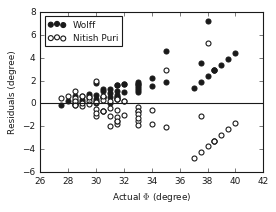

In [54]:
fig, ax = plt.subplots(figsize = (3.6,2.5))
#fig.set_size_inches(3.5,3)

ax.scatter(new["Testing"], new["Res_Wolff"], c = "k", label = "Wolff")
ax.scatter(new["Testing"], new["Res_N. Puri"], c = "w", label = "Nitish Puri")
#ax.scatter(new["Testing"], new["Res_Wolff"], c = "w", label = "Training Data")
ax.set(ylabel = "Residuals (degree)", xlabel = "Actual $\Phi$ (degree)")
ax.legend(loc = 2, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 1)
#fig.savefig("res_Wolff_N.Puri.jpg", dpi = 600, transparent=True, bbox_inches="tight")

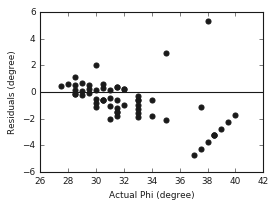

In [55]:
fig, ax = plt.subplots(figsize = (3.6,2.5))
#fig.set_size_inches(3.5,3)

ax.scatter(new["Testing"], new["Res_N. Puri"], c = "k", label = "Testing Data")
#ax.scatter(new["Testing"], new["Res_Wolff"], c = "w", label = "Training Data")
ax.set(ylabel = "Residuals (degree)", xlabel = "Actual Phi (degree)")
#ax.legend(loc = 2, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 1)
#fig.savefig("res_N. Puri.jpg", dpi = 600, transparent=True, bbox_inches="tight")

In [56]:
for i in ["Res_Wolff", "Res_N. Puri"]:
    print("2.5% of {} is: {:0.4f}".format(i,new[i].quantile(.025)))
    print("97.5% of {} is: {:0.4f}\n".format(i,new[i].quantile(.975)))

2.5% of Res_Wolff is: -0.0276
97.5% of Res_Wolff is: 4.4763

2.5% of Res_N. Puri is: -4.0261
97.5% of Res_N. Puri is: 2.5145



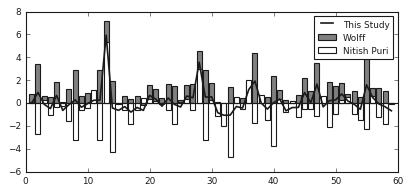

In [57]:
fig, ax = plt.subplots(figsize = (6,2.5))
i = np.arange(1,60)
#plt.bar(i, new["Res_LR"], label = "This Study")
plt.bar(i, new["Res_Wolff"], label = "Wolff", color = "grey")
plt.bar(i, new["Res_N. Puri"], label = "Nitish Puri", color = "white")
plt.plot(i, new["Res_LR"], label = "This Study", color = "k", linewidth = 1.5)
ax.legend(loc = 1, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
#fig.savefig("Barplot.jpg", dpi = 600, transparent=True, bbox_inches="tight")

In [58]:
new1 = new.sort_values(by = "Testing")
new1.head()

,SPT-N,SPT-N60,Testing,Wolff,N. Puri,N. Puri_60,Res_LR,Res_Wolff,Res_N. Puri
18,3.0,1.8,27.5,27.638250,27.0636,26.6886,-0.649037,-0.138250,0.4364
47,4.0,2.4,28.0,27.816890,27.3761,26.8761,-0.337164,0.183110,0.6239
14,8.0,4.8,28.5,28.527558,28.6261,27.6261,-0.645035,-0.027558,-0.1261
33,6.0,3.6,28.5,28.173002,28.0011,27.2511,-0.305691,0.326998,0.4989
10,4.0,2.4,28.5,27.816890,27.3761,26.8761,0.236655,0.683110,1.1239


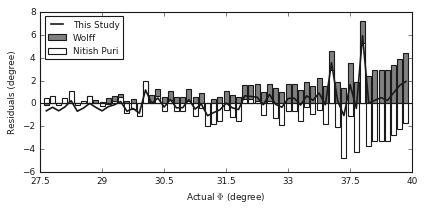

In [60]:

fig, ax = plt.subplots(figsize = (6,2.5))
i = np.arange(1,60)
#plt.bar(i, new["Res_LR"], label = "This Study")
plt.bar(i, new1["Res_Wolff"], label = "Wolff", color = "grey")
plt.bar(i, new1["Res_N. Puri"], label = "Nitish Puri", color = "white")
plt.plot(i, new1["Res_LR"], label = "This Study", color = "k", linewidth = 1.5)
ax.set(ylabel = "Residuals (degree)", xlabel = "Actual $\Phi$ (degree)")
ax.legend(loc = 2, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
plt.xticks([0,10,20,30,40,50,60],[27.5,29,30.5,31.5,33,37.5,40])
#fig.savefig("Barplot.jpg", dpi = 600, transparent=True, bbox_inches="tight")